# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

In [2]:
# load the data
# Date usually format: YYYY-MM-DD
df = pd.read_csv("../_data/nyc_data.csv", index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [3]:
# Rename variable
df = df.rename(columns={'Demand': 'y'})
df.head()

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


## Data Analysis

In [4]:
# Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


## Seasonal Decomposition

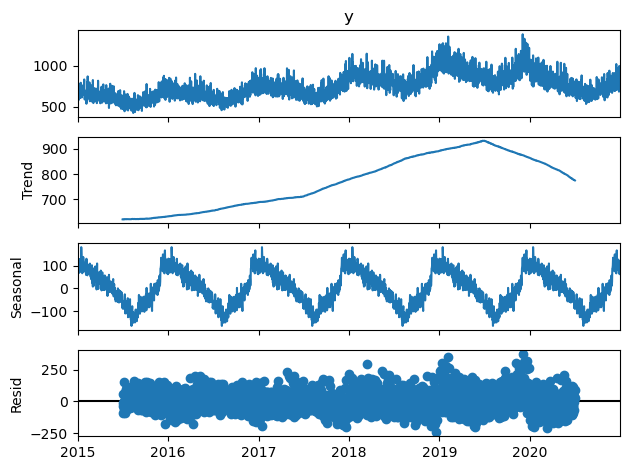

In [5]:
decomposition = seasonal_decompose(x=df.y,
                                   model='additive',
                                   period=365)
decomposition.plot();

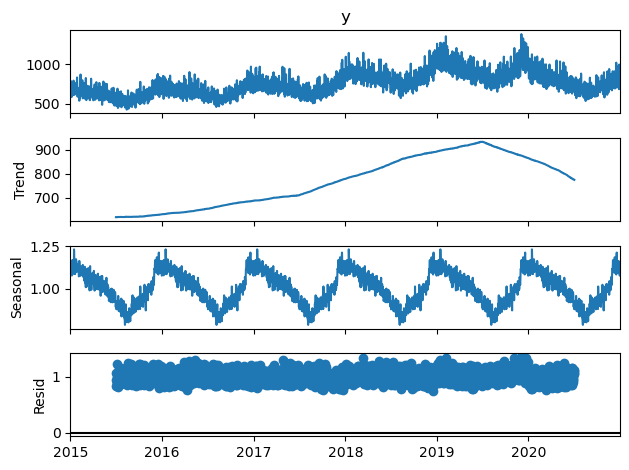

In [6]:
# decomposition
decomposition = seasonal_decompose(x=df.y,
                                   model='multiplicative',
                                   period=365)
decomposition.plot();

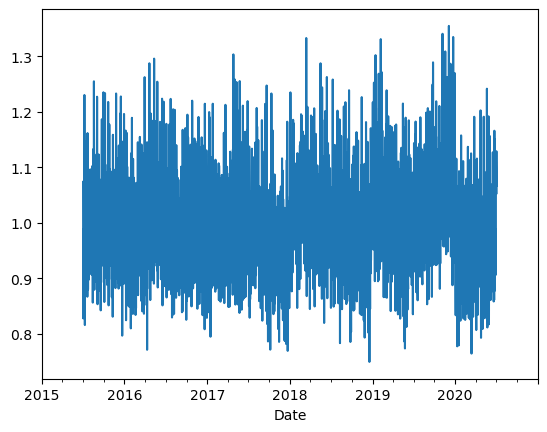

In [7]:
# plotting
decomposition.resid.plot();

In [8]:
# Aggregating on specific time frame
df.y.resample(rule='MS').mean() # Month Start
# df.y.resample(rule='Q').mean() # Quarter (season)
# df.y.resample(rule='W').mean() # Week

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

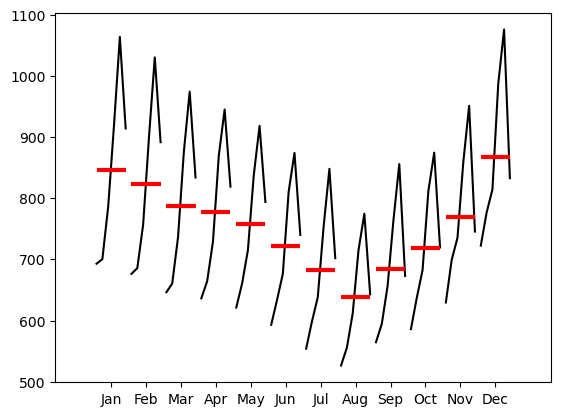

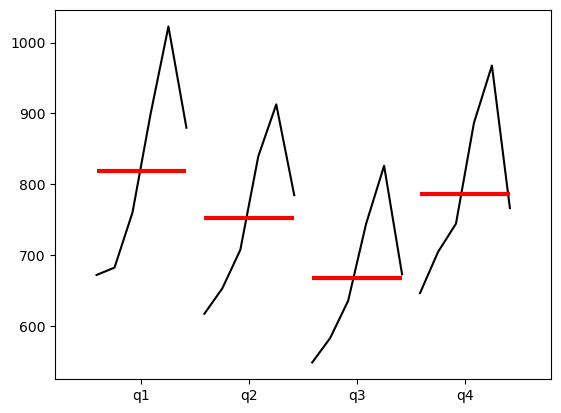

In [9]:
# Seasonal graphs
month_plot(x=df.y.resample(rule='MS').mean());
quarter_plot(x=df.y.resample(rule='Q').mean());

## Advanced visualization

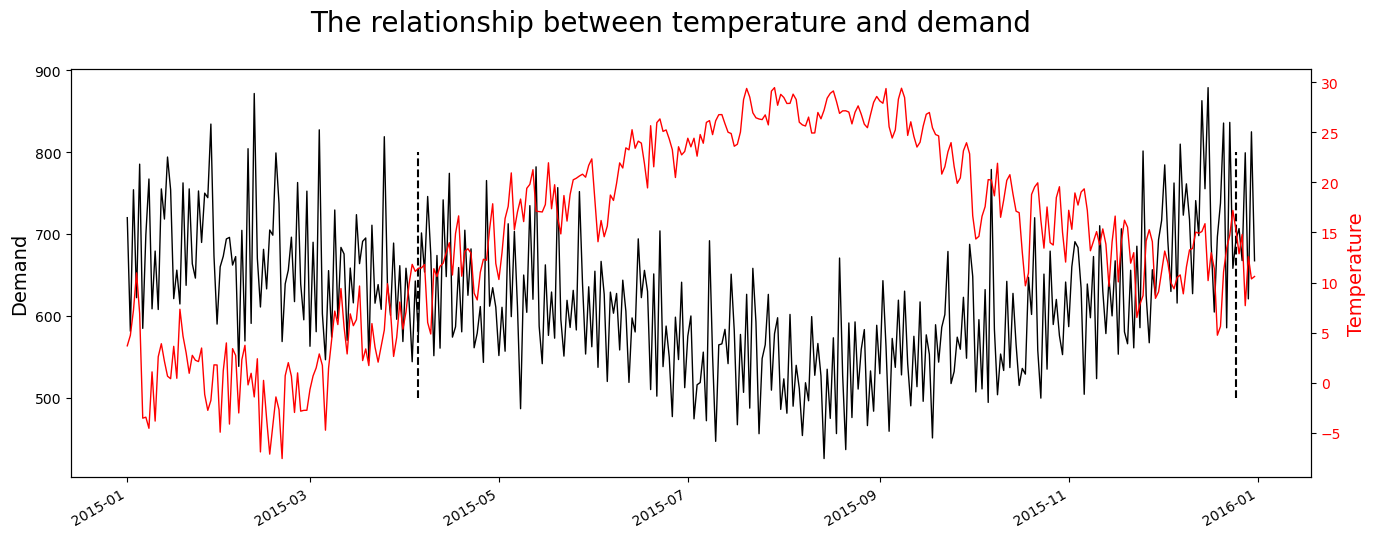

In [10]:
# Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2015-12-31']

# define the colors
temp_color = 'red'
y_color = 'black'

# plot
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

# Data and Lines
ax1.plot(df_plot.index, df_plot.y, color=y_color, lw=1)
ax2.plot(df_plot.index, df_plot.Temperature, color=temp_color, lw=1);

# Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize=20)
fig.autofmt_xdate()

# first axis
ax1.set_label("Date")
ax1.tick_params(axis="y", labelcolor=y_color)
ax1.set_ylabel("Demand", color=y_color, fontsize=14)

# second axis
ax2.tick_params(axis="y", labelcolor=temp_color)
ax2.set_ylabel("Temperature", color=temp_color, fontsize=14);

# Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x=events, ymin=500, ymax=800, color='k', ls='--')

In [11]:
# Correlation
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


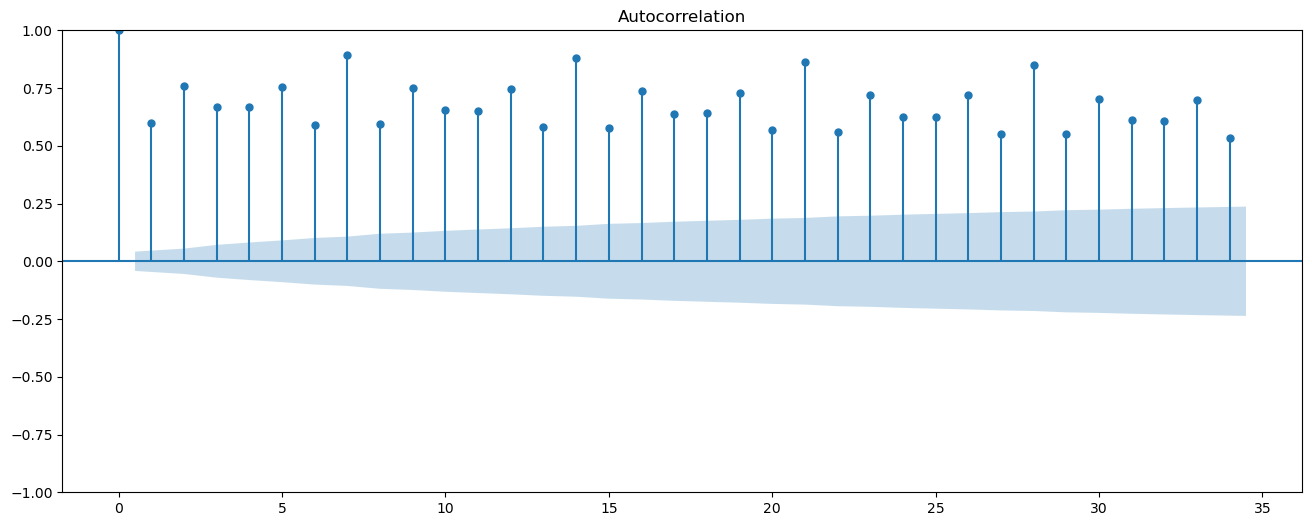

In [12]:
# Auto-Correlation plot (ACF)
plt.rcParams["figure.figsize"] = (16, 6)
plot_acf(df.y)
plt.show();